## Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import matplotlib.pyplot as plt
import pandas as pd
warnings.filterwarnings("ignore")
from scripts.create_nab_dataset import create_nab_data
from scripts.create_nuts_wind_data import create_nuts_data
from sz.SZ3.tools.pysz.pysz import SZ
from compress.sprintz_encode import compress_sprintz, decompress_sprintz, get_compress_info_sprintz
from compress.bypass import spatial_clustering
from compress.general_functions import get_errors, get_geo_dict, create_geo_plot
from compress.xor_encode import xor_compress_df, get_compress_info_xor, decompress_xor_df
from compress.lz4_encode import LZ4_compress_df, LZ4_decompress_df, get_compress_info_lz4
from compress.spatial_lz4 import spatial_clustering_PCA_LZ4, spatial_lz4_decompress, get_compress_info_spatial_PCA_LZ4
from compress.spatial_xor import spatial_clustering_xor, spatial_XOR_decompress, get_compress_info_spatial_xor
from compress.spatial_sprintz import spatial_clustering_sprintz, spatial_sprintz_decompress, get_compress_info_spatial_sprintz
from compress.sz3_encode import compress_sz3_df, decompress_sz3, get_compress_info_sz3, compress_sz3_all
from compress.cnn_encode import compress_cnn_sz3, decomress_cnn_sz3, get_compress_info_cnn_sz3, compress_cnn_cluster

2025-05-14 23:38:26.661219: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Params

In [2]:
table_params = [{
                'selector': 'caption',
                'props': [
                    ('color', 'Blue'),
                    ('font-size', '16pt'),
                    ('font-weight', 'bold'),
                    ('text-align', 'center'),
                    ('caption-side', 'top'),
                    ('padding', '10px')
                ]
            },
            {
                'selector': 'th',
                'props': [('font-size', '14pt')]
            }]

In [3]:
time_dict = {}
mem_dict = {}

## Data

### Download dataset

In [4]:
df_speed = create_nab_data()
df_speed.sample(2)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
280,86,82,81,76,96
2,86,93,69,88,71


In [14]:
country = "CZ"

In [15]:
df_wind, wind_geo_dict= create_nuts_data(country=country)

In [16]:
spatial_clustering(df_wind, wind_geo_dict, 0.9)

{'sensor_0': ['sensor_0',
  'sensor_2',
  'sensor_1',
  'sensor_6',
  'sensor_4',
  'sensor_3'],
 'sensor_7': ['sensor_7', 'sensor_5']}

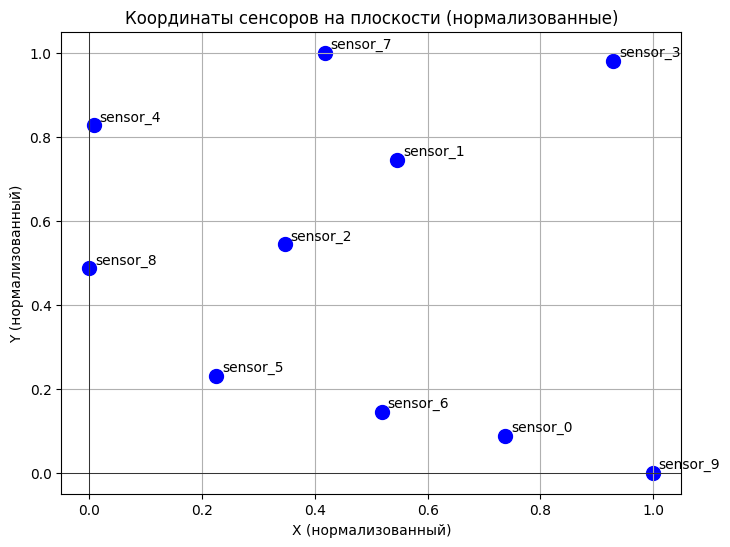

In [2]:
df_wind = pd.read_csv("/Users/roman/Desktop/диплом/final_repo/compress_time_series/data/PL_wind.csv")
with open('/Users/roman/Desktop/диплом/final_repo/compress_time_series/nuts_data/geo_dicts/geodict_PL.yaml', 'r') as file:
    wind_geo_dict = yaml.safe_load(file)
create_geo_plot(wind_geo_dict)

In [25]:
df_wind

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.06962,0.07138,0.04796,0.11252,0.05728,0.07686,0.05632,0.07469,0.03566,0.06522
2,0.10733,0.19506,0.12553,0.25549,0.19520,0.12189,0.06159,0.31064,0.09881,0.10075
3,0.09444,0.14037,0.14486,0.31576,0.23952,0.12935,0.04471,0.33948,0.08219,0.08663
4,0.12580,0.18716,0.19604,0.36298,0.31140,0.16321,0.04709,0.43146,0.12101,0.11639
...,...,...,...,...,...,...,...,...,...,...
5366,0.06609,0.17061,0.25076,0.16414,0.38098,0.16567,0.06964,0.40356,0.30052,0.24612
5367,0.07632,0.20133,0.27852,0.10975,0.43838,0.10716,0.07526,0.36628,0.48596,0.21578
5368,0.08920,0.31771,0.42352,0.09497,0.49461,0.15705,0.06736,0.41356,0.42799,0.16867
5369,0.07758,0.39027,0.37400,0.14037,0.50364,0.10005,0.05671,0.44181,0.20345,0.10669


### Creating wind Dataset

Возьмем данные о первых шести ветренных вышек.

In [ ]:
df_wind = df_wind_init[['AT', 'BE', 'BG', 'CH', 'CZ', 'DE']]
df_wind = df_wind.head(10000)

Видим, что данные ненулевые через определенные промежутки времени. Это связано с тем, что отсутствует непрерывность замеров данных. Оставим только те строки, где есть хотя бы одно ненулевое значение.

In [ ]:
df_wind = df_wind_init[['AT', 'BE', 'BG', 'CH', 'CZ', 'DE']]
df_wind = df_wind.head(10000)
df_wind = df_wind.loc[(
    df_wind[['AT', 'BE', 'BG', 'CH', 'CZ', 'DE']] != 0).any(axis=1)].reset_index(drop=True)
df_wind.columns = [f'sensor_{i}' for i in range(df_wind.shape[1])]
df_wind.info()

In [84]:
#df_wind.to_csv('data/wind_df.csv', index=False) # save test dataframe

## Geo data

### For NAB

sensor_0: [5.451348270088634, 1.7047174420658484]
sensor_1: [2.2354050645555255, 2.949514252466155]
sensor_2: [0.5211043017535166, 0.33879616762233744]
sensor_3: [2.671678823552793, 4.665453458494551]
sensor_4: [1.8181230272782525, 2.8155922206299904]


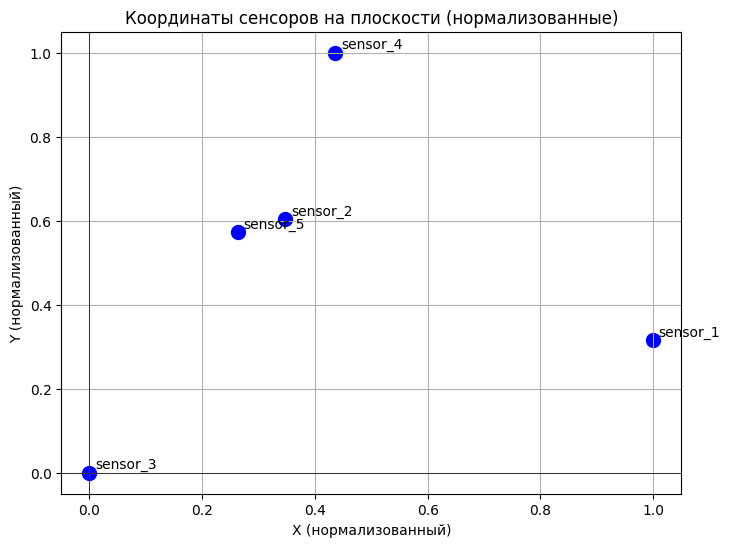

In [14]:
speed_geo_dict = get_geo_dict(df_speed)
create_geo_plot(speed_geo_dict)

### For wind

In [15]:
# with open(GEO_PATH / 'wind_geo_dict.yaml', 'r') as file:
#     wind_geo_dict = yaml.safe_load(file)
# create_geo_plot(wind_geo_dict)

In [16]:
# with open("/Users/roman/Desktop/диплом/final_repo/compress_time_series/geo_dicts/geodict_AT.yaml", 'r') as file:
#     wind_geo_dict = yaml.safe_load(file)

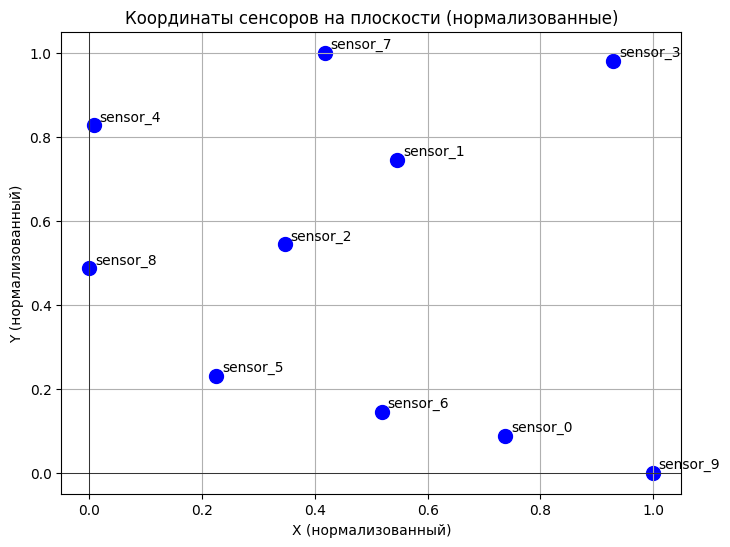

In [7]:
# wind_geo_dict = {column_mapping[key]: value for key, value in wind_geo_dict.items()}
create_geo_plot(wind_geo_dict)

## Data analisys

NAB Dataset

In [18]:
df_speed.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,82.126000,81.538000,81.862000,81.786000,82.222000
std,8.404963,9.247897,8.155488,8.913085,8.983659
min,43.000000,28.000000,53.000000,29.000000,20.000000
25%,77.000000,76.000000,77.000000,76.000000,77.000000
50%,83.000000,82.000000,82.000000,82.000000,83.000000
75%,87.000000,88.000000,87.000000,88.000000,88.000000
max,109.000000,103.000000,106.000000,106.000000,105.000000


In [19]:
corr_wind = df_speed.corr()
styled_corr = corr_wind.style.set_caption("Correlation matrix of NAB Dataset") \
                                  .background_gradient(cmap='coolwarm') \
                                  .set_properties(**{'font-size': '14pt'}) \
                                  .set_table_styles(table_params)
display(styled_corr)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
sensor_1,1.000000,0.216599,0.170231,0.160731,0.129970
sensor_2,0.216599,1.000000,0.238876,0.241704,0.254247
sensor_3,0.170231,0.238876,1.000000,0.342827,0.135786
sensor_4,0.160731,0.241704,0.342827,1.000000,0.326703
sensor_5,0.129970,0.254247,0.135786,0.326703,1.000000


Для датасета NAB явно видно, что столбцы не коррелируют. Рассмотрим датасет Emhires.

In [20]:
df_wind.describe()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8
count,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000
mean,0.265716,0.267080,0.247389,0.253213,0.230925,0.244525,0.243961,0.276073,0.259227
std,0.235079,0.213836,0.202249,0.217297,0.210958,0.217217,0.205805,0.221870,0.243024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062530,0.081885,0.081005,0.070430,0.059225,0.062395,0.072910,0.082700,0.053590
50%,0.193040,0.220700,0.198660,0.194500,0.166260,0.181300,0.189010,0.226820,0.175640
75%,0.432655,0.412725,0.371660,0.394085,0.352675,0.387110,0.377465,0.433580,0.427095
max,0.885610,0.899280,0.852360,0.877830,0.846630,0.860740,0.842230,0.887110,0.889540


In [20]:
corr_wind = df_wind.corr()
styled_corr_wind = corr_wind.style.set_caption("Correlation matrix of Emhires Dataset") \
                                  .background_gradient(cmap='coolwarm') \
                                  .set_properties(**{'font-size': '14pt'}) \
                                  .set_table_styles(table_params)

# Отображение матрицы корреляции
display(styled_corr_wind)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7
sensor_0,1.000000,0.947092,0.970650,0.914669,0.945220,0.844699,0.942943,0.877107
sensor_1,0.947092,1.000000,0.906447,0.906855,0.894900,0.838885,0.915576,0.861167
sensor_2,0.970650,0.906447,1.000000,0.871721,0.907614,0.805719,0.909532,0.839774
sensor_3,0.914669,0.906855,0.871721,1.000000,0.929427,0.891841,0.860315,0.947725
sensor_4,0.945220,0.894900,0.907614,0.929427,1.000000,0.888410,0.902604,0.926815
sensor_5,0.844699,0.838885,0.805719,0.891841,0.888410,1.000000,0.800930,0.957938
sensor_6,0.942943,0.915576,0.909532,0.860315,0.902604,0.800930,1.000000,0.835641
sensor_7,0.877107,0.861167,0.839774,0.947725,0.926815,0.957938,0.835641,1.000000


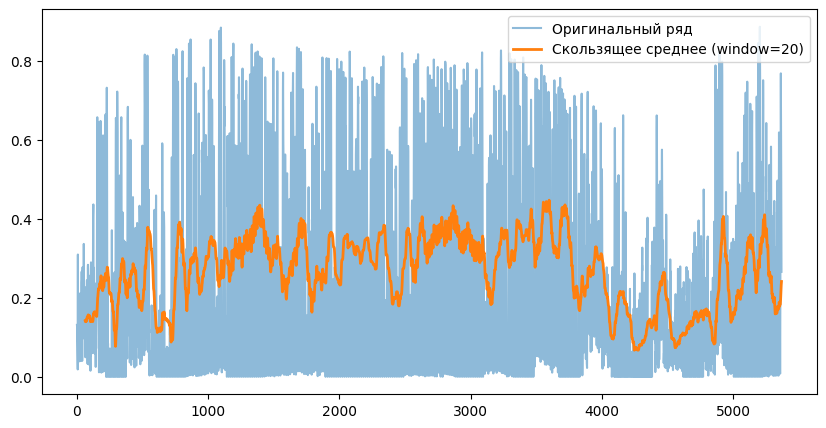

In [22]:
rolling_mean = df_wind.sensor_0.rolling(window=64).mean()

plt.figure(figsize=(10,5))
plt.plot(df_wind.sensor_0.values, label="Оригинальный ряд", alpha=0.5)
plt.plot(rolling_mean, label="Скользящее среднее (window=20)", linewidth=2)
plt.legend()
plt.show()

Проверка на кластеризацию обходом.

In [23]:
# df_wind = df_wind.drop('sensor_3', axis=1)


In [24]:
# wind_geo_dict = {'sensor_0': [4811443.447812709, 2735881.8286318835],
#  'sensor_1': [4747661.491811581, 2811955.513262155],
#  'sensor_2': [4794553.595084494, 2808800.3912897566],
#  'sensor_4': [4700355.9007669855, 2696835.3360548764],
#  'sensor_5': [4616056.5232700575, 2788264.2776017035],
#  'sensor_6': [4553948.223125471, 2702041.9954760773],
#  'sensor_7': [4434859.487515252, 2677011.4190844786],
#  'sensor_8': [4312985.411272273, 2680861.6217874517]}

In [25]:
# wind_geo_dict = {'sensor_0': [4811443.447812709, 2735881.8286318835],
#     'sensor_2': [4747661.491811581, 2811955.513262155],
#     'sensor_8': [4794553.595084494, 2808800.3912897566],
#     'sensor_1': [4620361.293102544, 2637005.7297918326],
#     'sensor_5': [4700355.9007669855, 2696835.3360548764],
#     'sensor_4': [4553948.223125471, 2702041.9954760773],
#     'sensor_6': [4434859.487515252, 2677011.4190844786],
#     'sensor_7': [4312985.411272273, 2680861.6217874517]}

In [26]:
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor_0  5371 non-null   float64
 1   sensor_1  5371 non-null   float64
 2   sensor_2  5371 non-null   float64
 3   sensor_3  5371 non-null   float64
 4   sensor_4  5371 non-null   float64
 5   sensor_5  5371 non-null   float64
 6   sensor_6  5371 non-null   float64
 7   sensor_7  5371 non-null   float64
 8   sensor_8  5371 non-null   float64
dtypes: float64(9)
memory usage: 377.8 KB


In [13]:
spatial_clustering(df_wind, wind_geo_dict, 0.9)

{'sensor_0': ['sensor_0',
  'sensor_2',
  'sensor_1',
  'sensor_6',
  'sensor_4',
  'sensor_3'],
 'sensor_7': ['sensor_7', 'sensor_5']}

## Sprintz

In [28]:
speed_sprintz_res = compress_sprintz(df=df_speed, chunk_size=8)

In [29]:
# Check for equals decodind and original data
decode_res = decompress_sprintz(speed_sprintz_res, num_cols = 5, chunk_size=7)
decode_res.columns = df_speed.columns
print('Данные совпадают после декодирования:', df_speed.equals(decode_res))

Данные совпадают после декодирования: True


In [ ]:
comp = get_compress_info_sprintz(df_speed, speed_sprintz_res)

Размер исходных данных: 2179 байт 

Размер сжатых данных: 1973 байт 

Коэффициент сжатия: 1.104


In [31]:
# #Рассмотрим количество используемой оперативной памяти и среднее время сжатия
# print('Compress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: compress_sprintz(df=df_speed, chunk_size=8), interval=0.0001)
# mem_dict['sprintz_enc'] = max(mem_usage) - baseline
# time_dict['sprintz_enc'] = %timeit -o compress_sprintz(df=df_speed, chunk_size=8)
# print('\n')
# #Рассмотрим количество используемой оперативной памяти и среднее время декодирования
# print('Decompress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: decompress_sprintz(speed_sprintz_res, num_cols = 5, chunk_size=7), interval=0.0001)
# mem_dict['sprintz_dec'] = max(mem_usage) - baseline
# time_dict['sprintz_dec'] = %timeit -o decompress_sprintz(speed_sprintz_res, num_cols = 5, chunk_size=7)

## XOR

In [8]:
compressed_df = xor_compress_df(df_wind)
decompressed_df = decompress_xor_df(compressed_df)
decompressed_df.columns = [f'sensor_{i}' for i in range(df_wind.shape[1])]
print('Данные совпадают после декодирования:', decompressed_df.equals(df_wind))

Данные совпадают после декодирования: True


In [9]:
comp = get_compress_info_xor(df_wind, compressed_df)

Размер исходных данных: 429680 байт 

Размер сжатых XOR данных: 425357 байт 

Коэффициент сжатия: 1.01


In [10]:
# #Рассмотрим количество используемой оперативной памяти и среднее время сжатия
# print('Compress: \n')
# time_dict['xor_enc'] = %timeit -o xor_compress_df(df_wind)
# print('\n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: xor_compress_df(df_wind), interval=0.0001)
# mem_dict['xor_enc'] = max(mem_usage) - baseline
# #Рассмотрим количество используемой оперативной памяти и среднее время декодирования
# print('Decompress: \n')
# time_dict['xor_dec'] = %timeit -o decompress_xor_df(compressed_df)
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: decompress_xor_df(compressed_df), interval=0.0001)
# mem_dict['xor_dec'] = max(mem_usage) - baseline

## LZ4

In [26]:
compressed_df = LZ4_compress_df(df_wind)

In [27]:
decompressed_df = LZ4_decompress_df(compressed_df)
print('Данные совпадают после декодирования:', decompressed_df.equals(df_wind))

Данные совпадают после декодирования: True


In [28]:
comp = get_compress_info_lz4(df_wind, compressed_df)

Размер исходных данных: 429680 байт 

Размер сжатых данных: 309404 байт 

Коэффициент сжатия: 1.389


In [14]:
# #Рассмотрим количество используемой оперативной памяти и среднее время сжатия
# print('Compress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: LZ4_compress_df(df_wind), interval=0.00001)
# mem_dict['LZ4_enc'] = max(mem_usage) - baseline
# time_dict['LZ4_enc'] = %timeit -o LZ4_compress_df(df_wind)
# print('\n')
# #Рассмотрим количество используемой оперативной памяти и среднее время декодирования
# print('Decompress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: LZ4_decompress_df(compressed_df), interval=0.00001)
# mem_dict['LZ4_dec'] = max(mem_usage) - baseline
# time_dict['LZ4_dec'] = %timeit -o LZ4_decompress_df(compressed_df)

## Spatial + XOR

In [29]:
df = df_wind.round(15).copy()

In [30]:
res = spatial_clustering_xor(df, wind_geo_dict, 0.87)
decompressed_df = spatial_XOR_decompress(res)
print('Check for decode:', decompressed_df.equals(df))

Check for decode: True


In [31]:
comp = get_compress_info_spatial_xor(df, res)

Размер исходных данных: 429680 байт 

Размер сжатых данных: 435240.75 байт 

Коэффициент сжатия: 0.987


In [32]:
# #Рассмотрим количество используемой оперативной памяти и среднее время сжатия
# print('Compress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: spatial_clustering_xor(df, wind_geo_dict), interval=0.00001)
# mem_dict['spatial_xor_enc'] = max(mem_usage) - baseline
# time_dict['spatial_xor_enc'] = %timeit -o spatial_clustering_xor(df, wind_geo_dict)
# print('\n')
# #Рассмотрим количество используемой оперативной памяти и среднее время декодирования
# print('Decompress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: spatial_XOR_decompress(res), interval=0.00001)
# mem_dict['spatial_xor_dec'] = max(mem_usage) - baseline
# time_dict['spatial_xor_dec'] = %timeit -o spatial_XOR_decompress(res)

## Spatial + Sprintz

In [33]:
df = df_wind*100
df = df.astype(int)

In [34]:
res = spatial_clustering_sprintz(df.copy(), wind_geo_dict, 0.87)

In [35]:
clust_dict = spatial_clustering(
    df, wind_geo_dict, 0.87)
decode_res = spatial_sprintz_decompress(res,
                                        clust_dict)
print('Данные совпадают после декодирования:', df.equals(decode_res))

KeyError: 'sensor_1'

In [ ]:
decode_res

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7
0,2,4,2,8,10,13,5,15
1,-1,-3,-12,3,3,21,1,13
2,3,0,-12,8,11,26,0,23
3,4,-5,-14,11,6,30,2,30
4,13,-2,17,24,5,28,17,30
...,...,...,...,...,...,...,...,...
5366,7,-5,-11,7,7,1,-6,14
5367,6,-6,-12,6,6,3,-2,13
5368,3,3,3,3,2,7,3,3
5369,3,3,4,3,2,8,3,3


In [128]:
get_compress_info_spatial_sprintz(df, res)

Размер исходных данных: 23080 байт 

Размер сжатых данных: 38003 байт 

Коэффициент сжатия: 0.607


In [129]:
# #Рассмотрим количество используемой оперативной памяти и среднее время сжатия
# print('Compress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: spatial_clustering_sprintz(df.copy(), wind_geo_dict, 0.84), interval=0.00001)
# mem_dict['spatial_sprintz_enc'] = max(mem_usage) - baseline
# time_dict['spatial_sprintz_enc'] = %timeit -o spatial_clustering_sprintz(df.copy(), wind_geo_dict, 0.84)
# print('\n')
# #Рассмотрим количество используемой оперативной памяти и среднее время декодирования
# print('Decompress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: spatial_sprintz_decompress(res, clust_dict), interval=0.00001)
# mem_dict['spatial_sprintz_dec'] = max(mem_usage) - baseline
# time_dict['spatial_sprintz_dec'] = %timeit -o spatial_sprintz_decompress(res, clust_dict)

## Spatial + PCA + LZ4

In [4]:
import yaml

In [6]:
df_wind = pd.read_csv("/Users/roman/Desktop/диплом/final_repo/compress_time_series/data/CZ_wind.csv")
with open('/Users/roman/Desktop/диплом/final_repo/compress_time_series/nuts_data/geo_dicts/geodict_CZ.yaml', 'r') as file:
    wind_geo_dict = yaml.safe_load(file)

In [14]:
corr = 0.87
spatial_clustering(df_wind, wind_geo_dict, corr)

{'sensor_0': ['sensor_0',
  'sensor_2',
  'sensor_1',
  'sensor_6',
  'sensor_4',
  'sensor_3',
  'sensor_7'],
 'sensor_5': ['sensor_5']}

In [15]:
res = spatial_clustering_PCA_LZ4(df_wind, wind_geo_dict,corr)

In [16]:
comp = get_compress_info_spatial_PCA_LZ4(df_wind, res)

Размер исходных данных: 343744 байт 

Размер сжатых данных: 161027 байт 

Коэффициент сжатия: 2.135


In [17]:
clusters = spatial_clustering(df_wind, wind_geo_dict, corr)
dec_res = spatial_lz4_decompress(res, clusters)
mse, mape = get_errors(df_wind, dec_res)

MSE: 0.001209 

MAPE: 18.01 %


In [ ]:
# #Рассмотрим количество используемой оперативной памяти и среднее время сжатия
# print('Compress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: spatial_clustering_PCA_LZ4(df_wind, wind_geo_dict), interval=0.00001)
# mem_dict['PCA_enc'] = max(mem_usage) - baseline
# time_dict['PCA_enc'] = %timeit -o spatial_clustering_PCA_LZ4(df_wind, wind_geo_dict)
# print('\n')
# #Рассмотрим количество используемой оперативной памяти и среднее время декодирования
# print('Decompress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: spatial_lz4_decompress(res, clusters), interval=0.00001)
# mem_dict['PCA_dec'] = max(mem_usage) - baseline
# time_dict['PCA_dec'] = %timeit -o spatial_lz4_decompress(res, clusters)

## SZ3

In [40]:
data_enc = compress_sz3_df(df_wind, 0.03)

In [41]:
comp = get_compress_info_sz3(df_wind, data_enc)

Размер исходных данных: 429680 байт 

Размер сжатых данных: 22980 байт 

Коэффициент сжатия: 18.698


In [42]:
data = df_wind.values.transpose()
shape = [d.shape for d in data]
type = data[0].dtype
data_dec = decompress_sz3(data_enc, shape, type)
get_errors(df_wind, data_dec)

MSE: 0.000279 

MAPE: 23.63 %


(0.000279, 23.63)

In [ ]:
# data = df_wind[['sensor_2', 'sensor_5', 'sensor_8']].iloc[:64].values.transpose()
# shape = [d.shape for d in data]
# type = data[0].dtype
# data_dec = decompress_sz3(data_enc, shape, type)
# get_errors(df_wind[['sensor_2', 'sensor_5', 'sensor_8']].iloc[:64], data_dec)

In [57]:
# #Рассмотрим количество используемой оперативной памяти и среднее время сжатия
# print('Compress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: compress_sz3_df(df_wind), interval=0.00001)
# mem_dict['SZ3_enc'] = max(mem_usage) - baseline
# time_dict['SZ3_enc'] = %timeit -o compress_sz3_df(df_wind)
# print('\n')
# #Рассмотрим количество используемой оперативной памяти и среднее время декодирования
# print('Decompress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: decompress_sz3(data_enc, shape, type), interval=0.00001)
# mem_dict['SZ3_dec'] = max(mem_usage) - baseline
# time_dict['SZ3_dec'] = %timeit -o decompress_sz3(data_enc, shape, type)

In [58]:
# from sz.SZ3.tools.pysz.pysz import SZ
# from compress.general_functions import get_float_bytes
# import sys

# lib_extension = {
#         "darwin": "libSZ3c.dylib",  # macOS
#         "win32": "SZ3c.dll",  # Windows
#     }.get(sys.platform, "libSZ3c.so")  # Linux (по умолчанию)
# sz = SZ(f"/usr/local/lib/{lib_extension}")


In [59]:
# data = df_wind.values.transpose()
# data_cmpr, _ = sz.compress(data, eb_mode=1, eb_pwr=0, eb_rel=0.003, eb_abs=0)
# data_dec = sz.decompress(data_cmpr, data.shape, data[0].dtype)
# dec_df = pd.DataFrame(data_dec).transpose()
# dec_df.columns = [f"sensor_{i}" for i in range(dec_df.shape[1])] 
# get_errors(df_wind, dec_df)

In [60]:
# data = df_wind_1.values.transpose()
# data_cmpr, _ = sz.compress(data, eb_mode=1, eb_pwr=0, eb_rel=0.03, eb_abs=0)
# data_dec = sz.decompress(data_cmpr, data.shape, data[0].dtype)
# dec_df = pd.DataFrame(data_dec).transpose()
# dec_df.columns = [f"sensor_{i}" for i in range(dec_df.shape[1])] 
# get_errors(df_wind_1, dec_df)

In [70]:
# compress whole data
data = df_wind.values.transpose()
data_enc = compress_sz3_all(df_wind, 0.03)

In [ ]:
comp = get_compress_info_sz3(df_wind, data_enc)

Размер исходных данных: 429680 байт 

Размер сжатых данных: 17635 байт 

Коэффициент сжатия: 24.365


In [72]:
data_dec = decompress_sz3(data_enc, data.shape, data.dtype)
get_errors(df_wind, data_dec)

MSE: 0.000263 

MAPE: 41.7 %


## SZ3 + Conv

### Main sensor data.

Сожмем данные только одного кластера с помощью CNN и SZ3. Используем для сжатия модели алгоритм zstd.

In [ ]:
cluster_enc = {}
cluster_sensors = ['sensor_7', 'sensor_3']  #выделяем коррелирующие сенсоры
cluster_enc[tuple(cluster_sensors)] = compress_cnn_cluster(df_wind[cluster_sensors], use_dwt=False,
                                                           window_size=64, num_epochs=200, extra_layer=True,
                                                           conv_filter=3, plot_flag=False,
                                                           er_abs_sz3=0.03,  model_compress="zstd")

Время обучения: 278.73 секунд
INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='keras_tensor_30')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140385869854848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385869432784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385870012080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385887452672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385887451264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385887452320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385888030208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385887824880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385887822592: TensorSpec(shape=(), dtype=tf.resource, name=None)
Size of compressed model (bytes): 7782


W0000 00:00:1747244562.699754 2776956 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747244562.699773 2776956 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-14 20:42:42.700057: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-14 20:42:42.701427: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-14 20:42:42.701440: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-14 20:42:42.720836: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-14 20:42:42.781027: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-14 20:42:42.802762: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 102706 microseconds.


In [16]:
print('Сжатия кластера \n')
get_compress_info_cnn_sz3(df_wind[cluster_sensors], cluster_enc)

Сжатия кластера 

Размер исходных данных: 85936 байт 

Размер сжатых данных: 10344 байт 

Коэффициент сжатия: 8.308


8.308

In [12]:
dec_cluster_df = decomress_cnn_sz3(cluster_enc, (5371,), use_dwt=False, model_compress="zstd")
dec_cluster_df = dec_cluster_df.sort_index(axis=1)

[0.         0.08625    0.045      ... 0.05444588 0.04201174 0.05749461] 

[0.         0.0525     0.09       ... 0.08088043 0.05207883 0.08040491] 

[0.         0.065625   0.1125     ... 0.05506963 0.04470624 0.05847077] 



INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [13]:
get_errors(df_wind[cluster_sensors].sort_index(axis=1), dec_cluster_df)

MSE: 0.006015 

MAPE: 63.88 %


(0.006015, 63.88)

In [20]:
# cluster_enc_zstd = {}
# cluster_enc_lz4 = {}
# cluster_enc_zstd[tuple(cluster_sensors)] = compress_cnn_cluster(df_wind[cluster_sensors], use_dwt=False, window_size=64, num_epochs=70, 
#                                                            plot_flag=False, model_compress="zstd")
# cluster_enc_lz4[tuple(cluster_sensors)] = compress_cnn_cluster(df_wind[cluster_sensors], use_dwt=False, window_size=64, num_epochs=70, 
#                                                            plot_flag=False, model_compress="lz4")

# #Рассмотрим количество используемой оперативной памяти и среднее время сжатия
# print('Compress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: compress_cnn_cluster(df_wind[cluster_sensors], use_dwt=False,
#                                                       window_size=64, num_epochs=70, plot_flag=False,
#                                                       model_compress="zstd"), interval=1)
# mem_dict['SZ3_CNN_ZSTD_enc'] = max(mem_usage) - baseline
# time_dict['SZ3_CNN_ZSTD_enc'] = %timeit -o compress_cnn_cluster(df_wind[cluster_sensors], use_dwt=False, window_size=64, num_epochs=70, plot_flag=False, model_compress="zstd")
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: compress_cnn_cluster(df_wind[cluster_sensors], use_dwt=False,
#                                                       window_size=64, num_epochs=70,
#                                                       plot_flag=False, model_compress="lz4"), interval=1)
# mem_dict['SZ3_CNN_LZ4_enc'] = max(mem_usage) - baseline
# time_dict['SZ3_CNN_LZ4_enc'] = %timeit -o compress_cnn_cluster(df_wind[cluster_sensors], use_dwt=False, window_size=64, num_epochs=70, plot_flag=False, model_compress="lz4")
# print('\n')
# #Рассмотрим количество используемой оперативной памяти и среднее время декодирования
# print('Decompress: \n')
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: decomress_cnn_sz3(cluster_enc_zstd, (5371,),
#                                                    use_dwt=False, model_compress="zstd"), interval=1)
# mem_dict['SZ3_CNN_ZSTD_dec'] = max(mem_usage) - baseline
# time_dict['SZ3_CNN_ZSTD_dec'] = %timeit -o decomress_cnn_sz3(cluster_enc_zstd, (5371,), use_dwt=False, model_compress="zstd")
# baseline = memory_usage(-1, interval=0.1, timeout=1)[0]
# mem_usage = memory_usage(lambda: decomress_cnn_sz3(cluster_enc_lz4, (5371,),
#                                                    use_dwt=False, model_compress="lz4"), interval=1)
# mem_dict['SZ3_CNN_LZ4_dec'] = max(mem_usage) - baseline
# time_dict['SZ3_CNN_LZ4_dec'] = %timeit -o decomress_cnn_sz3(cluster_enc_lz4, (5371,), use_dwt=False, model_compress="lz4")

Теперь сожмем все данные.

In [14]:
# Используем LZ4 для сжатия.
enc_df = compress_cnn_sz3(df_wind,
                          wind_geo_dict,
                          cor_lvl=0.87,
                          use_dwt=False,
                          window_size=64,
                          num_epochs=40,
                          extra_layer=True,
                          conv_filter=3,
                          plot_flag=False,
                          er_abs_sz3=0.03,
                          model_compress="lz4")

['sensor_6', 'sensor_9', 'sensor_5', 'sensor_2', 'sensor_1', 'sensor_8', 'sensor_3', 'sensor_7', 'sensor_4']
clust: ['sensor_0']
it, sen: sensor_0 sensor_6
clust: ['sensor_0', 'sensor_6']
it, sen: sensor_0 sensor_9
clust: ['sensor_0', 'sensor_6', 'sensor_9']
it, sen: sensor_0 sensor_5
clust: ['sensor_0', 'sensor_6', 'sensor_9', 'sensor_5']
it, sen: sensor_0 sensor_2
Sensors in cluster: ['sensor_0', 'sensor_6', 'sensor_9', 'sensor_5'] 

Время обучения: 57.77 секунд
INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140385751185008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385822718608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385751140128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385818362272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385751081200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385826875872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385826874464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385826877104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385785851216: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747244124.202601 2776956 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747244124.202631 2776956 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-14 20:35:24.203137: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-14 20:35:24.204528: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-14 20:35:24.204543: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-14 20:35:24.224243: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-14 20:35:24.284045: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-14 20:35:24.305994: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 102859 microseconds.


Size of compressed model (bytes): 9050
['sensor_1', 'sensor_8', 'sensor_4', 'sensor_7', 'sensor_3']
clust: ['sensor_2']
it, sen: sensor_2 sensor_1
clust: ['sensor_2', 'sensor_1']
it, sen: sensor_2 sensor_8
clust: ['sensor_2', 'sensor_1', 'sensor_8']
it, sen: sensor_2 sensor_4
clust: ['sensor_2', 'sensor_1', 'sensor_8', 'sensor_4']
it, sen: sensor_2 sensor_7
Sensors in cluster: ['sensor_2', 'sensor_1', 'sensor_8', 'sensor_4'] 

Время обучения: 58.29 секунд
INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140385795024144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385793994416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385793993536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385785929568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385794805824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385786514240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385794910336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385794910160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385794511264: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747244183.442910 2776956 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747244183.442928 2776956 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-14 20:36:23.443229: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-14 20:36:23.444944: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-14 20:36:23.444963: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-14 20:36:23.464393: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-14 20:36:23.522956: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-14 20:36:23.544397: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 101169 microseconds.


Size of compressed model (bytes): 9091
['sensor_3']
clust: ['sensor_7']
it, sen: sensor_7 sensor_3
last cluster: ['sensor_7', 'sensor_3']
Время обучения: 53.89 секунд
INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140385795017888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385854027200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385854026144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385854029664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385854043232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385854044816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385854043936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385854120704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385854121056: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747244238.262609 2776956 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747244238.262627 2776956 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


Size of compressed model (bytes): 9044


2025-05-14 20:37:18.262913: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-14 20:37:18.264460: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-14 20:37:18.264475: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-14 20:37:18.283159: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-14 20:37:18.343295: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-14 20:37:18.365053: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 102139 microseconds.


In [49]:
get_compress_info_cnn_sz3(df_wind, enc_df)

Размер исходных данных: 429680 байт 

Размер сжатых данных: 36412 байт 

Коэффициент сжатия: 11.801


11.801

In [41]:
enc_df = compress_cnn_sz3(df_wind,
                          wind_geo_dict,
                          cor_lvl=0.87,
                          use_dwt=False,
                          window_size=64,
                          num_epochs=200,
                          extra_layer=True,
                          conv_filter=3,
                          plot_flag=False,
                          er_abs_sz3=0.03,
                          model_compress="zstd")

['sensor_6', 'sensor_9', 'sensor_5', 'sensor_2', 'sensor_1', 'sensor_8', 'sensor_3', 'sensor_7', 'sensor_4']
clust: ['sensor_0']
it, sen: sensor_0 sensor_6
clust: ['sensor_0', 'sensor_6']
it, sen: sensor_0 sensor_9
clust: ['sensor_0', 'sensor_6', 'sensor_9']
it, sen: sensor_0 sensor_5
clust: ['sensor_0', 'sensor_6', 'sensor_9', 'sensor_5']
it, sen: sensor_0 sensor_2
Sensors in cluster: ['sensor_0', 'sensor_6', 'sensor_9', 'sensor_5'] 

Время обучения: 258.97 секунд
INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='keras_tensor_156')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140384949931344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384949929056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384949931168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384949930112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384950019520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384950019872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384950019344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384951211456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384951211280: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747027758.093673 1986181 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747027758.093691 1986181 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-12 08:29:18.093997: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-12 08:29:18.095386: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-12 08:29:18.095404: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-12 08:29:18.113906: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-12 08:29:18.173275: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-12 08:29:18.194748: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 100751 microseconds.


Size of compressed model (bytes): 7795
['sensor_1', 'sensor_8', 'sensor_4', 'sensor_7', 'sensor_3']
clust: ['sensor_2']
it, sen: sensor_2 sensor_1
clust: ['sensor_2', 'sensor_1']
it, sen: sensor_2 sensor_8
clust: ['sensor_2', 'sensor_1', 'sensor_8']
it, sen: sensor_2 sensor_4
clust: ['sensor_2', 'sensor_1', 'sensor_8', 'sensor_4']
it, sen: sensor_2 sensor_7
Sensors in cluster: ['sensor_2', 'sensor_1', 'sensor_8', 'sensor_4'] 

Время обучения: 255.88 секунд
INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='keras_tensor_162')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140384960164080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384949999920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384959957120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384959921488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384960209312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384960287312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384960287488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384960287136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384960258464: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747028014.926930 1986181 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747028014.926953 1986181 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-12 08:33:34.927240: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-12 08:33:34.928733: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-12 08:33:34.928747: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-12 08:33:34.948174: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-12 08:33:35.007862: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-12 08:33:35.028651: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 101411 microseconds.


Size of compressed model (bytes): 7798
['sensor_3']
clust: ['sensor_7']
it, sen: sensor_7 sensor_3
last cluster: ['sensor_7', 'sensor_3']
Время обучения: 261.90 секунд
INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='keras_tensor_168')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140384979449632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384979451216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384979448576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384979476720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384979478304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384979554720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384979554896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384979554544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384979564320: TensorSpec(shape=(), dtype=tf.resource, name=None)
Size of compressed model (bytes): 7767


W0000 00:00:1747028277.775273 1986181 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747028277.775291 1986181 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-12 08:37:57.775613: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-12 08:37:57.776980: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-12 08:37:57.776995: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-12 08:37:57.795705: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-12 08:37:57.853724: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-12 08:37:57.875522: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 99910 microseconds.


In [42]:
get_compress_info_cnn_sz3(df_wind, enc_df)

Размер исходных данных: 429680 байт 

Размер сжатых данных: 32471 байт 

Коэффициент сжатия: 13.233


13.233

In [43]:
dec_df = decomress_cnn_sz3(enc_df, (5371,), use_dwt=False)
dec_df = dec_df.sort_index(axis=1)

[0.         0.08625    0.045      ... 0.0879953  0.02664699 0.04418186] 

[0.         0.0525     0.09       ... 0.0984615  0.03651817 0.06291115] 

[0.         0.065625   0.1125     ... 0.09749465 0.03222555 0.05163482] 

[0.         0.06375    0.195      ... 0.42629611 0.43175125 0.30069396] 

[0.         0.0525     0.09       ... 0.40324944 0.36587253 0.29813614] 

[0.         0.07125    0.225      ... 0.3866871  0.33416626 0.26067394] 

[0.         0.0975     0.27       ... 0.35248905 0.15847607 0.18758596] 



In [44]:
dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor_0  5371 non-null   float64
 1   sensor_1  5371 non-null   float64
 2   sensor_2  5371 non-null   float64
 3   sensor_3  5371 non-null   float64
 4   sensor_4  5371 non-null   float64
 5   sensor_5  5371 non-null   float64
 6   sensor_6  5371 non-null   float64
 7   sensor_7  5371 non-null   float64
 8   sensor_8  5371 non-null   float64
 9   sensor_9  5371 non-null   float64
dtypes: float64(10)
memory usage: 419.7 KB


In [45]:
get_errors(df_wind, dec_df)

MSE: 0.005313 

MAPE: 61.24 %


(0.005313, 61.24)

### Добавление DWT.

Теперь будем использовать модель, выделяя дополнительные признаки - коэффициенты DWT.

Сожмем данные только кластера с помощью CNN и SZ3.

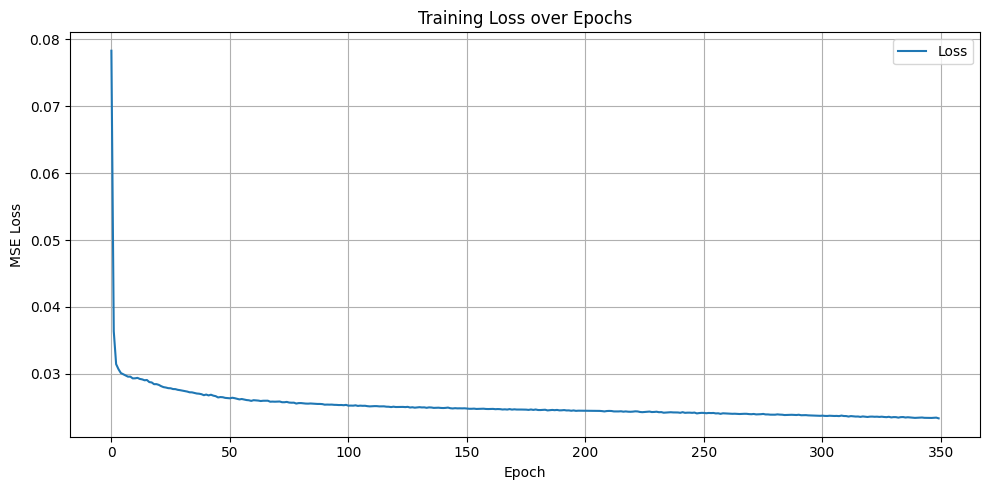

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='seq_input'), TensorSpec(shape=(None, 77), dtype=tf.float32, name='dwt_input')]
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140650363990256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140650363990960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140650363990080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140650363860768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140650363861296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140650363958368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140650363958016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140650363960128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140650363959600: TensorSpec(shape=(), dtype=tf.resource, name=None)
Size of compressed model (by

W0000 00:00:1746942918.584585 1685803 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1746942918.584645 1685803 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-11 08:55:18.585195: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-11 08:55:18.587494: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-11 08:55:18.587515: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-11 08:55:18.610114: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-11 08:55:18.682041: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-11 08:55:18.705649: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 120487 microseconds.


In [46]:
cluster_enc = {}
cluster_sensors = ['sensor_0', 'sensor_2', 'sensor_1', 'sensor_6'] #выделяем коррелирующие сенсоры
cluster_enc[tuple(cluster_sensors)] = compress_cnn_cluster(df_wind[cluster_sensors], use_dwt=True,
                                                           window_size=64, num_epochs=350, conv_filter=3, plot_flag=True,
                                                           er_abs_sz3=0.03,  model_compress="zstd")

In [47]:
print('Сжатия кластера \n')
get_compress_info_cnn_sz3(df_wind[cluster_sensors], cluster_enc)

Сжатия кластера 

Размер исходных данных: 171872 байт 

Размер сжатых данных: 13643 байт 

Коэффициент сжатия: 12.598


In [48]:
dec_cluster_df = decomress_cnn_sz3(cluster_enc, (5371,), use_dwt=True)
dec_cluster_df = dec_cluster_df.sort_index(axis=1)

[0.         0.05707031 0.06515625 ... 0.02588383 0.15667096 0.13106911] 

[0.06       0.08378906 0.10078125 ... 0.03902733 0.18678077 0.15011126] 

[0.06       0.09011719 0.12796875 ... 0.03354609 0.17022765 0.13841486] 



In [49]:
get_errors(df_wind[cluster_sensors], dec_cluster_df)

MSE: 0.005985 

MAPE: 76.53 %


Теперь сожмем все данные.

In [46]:
#lz4 model compression
enc_df = compress_cnn_sz3(df_wind,
                          wind_geo_dict,
                          cor_lvl=0.87,
                          use_dwt=True,
                          window_size=64,
                          num_epochs=40,
                          conv_filter=3,
                          plot_flag=False,
                          er_abs_sz3=0.03,
                          model_compress="lz4")

['sensor_6', 'sensor_9', 'sensor_5', 'sensor_2', 'sensor_1', 'sensor_8', 'sensor_3', 'sensor_7', 'sensor_4']
clust: ['sensor_0']
it, sen: sensor_0 sensor_6
clust: ['sensor_0', 'sensor_6']
it, sen: sensor_0 sensor_9
clust: ['sensor_0', 'sensor_6', 'sensor_9']
it, sen: sensor_0 sensor_5
clust: ['sensor_0', 'sensor_6', 'sensor_9', 'sensor_5']
it, sen: sensor_0 sensor_2
Sensors in cluster: ['sensor_0', 'sensor_6', 'sensor_9', 'sensor_5'] 

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='seq_input'), TensorSpec(shape=(None, 77), dtype=tf.float32, name='dwt_input')]
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140385020549248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385021395888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385021395712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385021433104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385021433456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385008583600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385008583248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385008586416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385008740480: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747031168.871100 1986181 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747031168.871129 1986181 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-12 09:26:08.871533: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-12 09:26:08.873216: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-12 09:26:08.873231: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-12 09:26:08.893127: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-12 09:26:08.952155: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-12 09:26:08.973387: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 101864 microseconds.


Size of compressed model (bytes): 11794
['sensor_1', 'sensor_8', 'sensor_4', 'sensor_7', 'sensor_3']
clust: ['sensor_2']
it, sen: sensor_2 sensor_1
clust: ['sensor_2', 'sensor_1']
it, sen: sensor_2 sensor_8
clust: ['sensor_2', 'sensor_1', 'sensor_8']
it, sen: sensor_2 sensor_4
clust: ['sensor_2', 'sensor_1', 'sensor_8', 'sensor_4']
it, sen: sensor_2 sensor_7
Sensors in cluster: ['sensor_2', 'sensor_1', 'sensor_8', 'sensor_4'] 

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='seq_input'), TensorSpec(shape=(None, 77), dtype=tf.float32, name='dwt_input')]
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140385032043152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385032043680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385032047776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385032156256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385032156432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385032156784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385032156080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385032157488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385032157312: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747031223.192690 1986181 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747031223.192708 1986181 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-12 09:27:03.193037: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-12 09:27:03.194506: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-12 09:27:03.194521: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-12 09:27:03.213558: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-12 09:27:03.272397: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-12 09:27:03.295086: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 102050 microseconds.


Size of compressed model (bytes): 11813
['sensor_3']
clust: ['sensor_7']
it, sen: sensor_7 sensor_3
last cluster: ['sensor_7', 'sensor_3']
INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='seq_input'), TensorSpec(shape=(None, 77), dtype=tf.float32, name='dwt_input')]
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140385078132976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385078132800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385078133328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385078084000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385078084352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385078085408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385078087344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385085132464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385078646032: TensorSpec(shape=(), dtype=tf.resource, name=None)
Size of compressed model (by

W0000 00:00:1747031278.063418 1986181 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747031278.063437 1986181 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-12 09:27:58.063732: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-12 09:27:58.065299: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-12 09:27:58.065318: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-12 09:27:58.083790: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-12 09:27:58.144837: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-12 09:27:58.167187: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 103456 microseconds.


In [47]:
get_compress_info_cnn_sz3(df_wind, enc_df)

Размер исходных данных: 429680 байт 

Размер сжатых данных: 44447 байт 

Коэффициент сжатия: 9.667


9.667

In [37]:
#zstd model compression
enc_df = compress_cnn_sz3(df_wind,
                          wind_geo_dict,
                          cor_lvl=0.87,
                          use_dwt=True,
                          window_size=64,
                          num_epochs=250,
                          conv_filter=3,
                          plot_flag=False,
                          er_abs_sz3=0.03,
                          model_compress="zstd")

['sensor_6', 'sensor_9', 'sensor_5', 'sensor_2', 'sensor_1', 'sensor_8', 'sensor_3', 'sensor_7', 'sensor_4']
clust: ['sensor_0']
it, sen: sensor_0 sensor_6
clust: ['sensor_0', 'sensor_6']
it, sen: sensor_0 sensor_9
clust: ['sensor_0', 'sensor_6', 'sensor_9']
it, sen: sensor_0 sensor_5
clust: ['sensor_0', 'sensor_6', 'sensor_9', 'sensor_5']
it, sen: sensor_0 sensor_2
Sensors in cluster: ['sensor_0', 'sensor_6', 'sensor_9', 'sensor_5'] 

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='seq_input'), TensorSpec(shape=(None, 77), dtype=tf.float32, name='dwt_input')]
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140384911697872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384911696112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384911699808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384925452768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384925452592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384925454000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384925452944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384925505488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384925504960: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747026779.809312 1986181 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747026779.809343 1986181 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-12 08:12:59.809793: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-12 08:12:59.811886: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-12 08:12:59.811905: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-12 08:12:59.831670: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-12 08:12:59.892056: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-12 08:12:59.914271: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 104490 microseconds.


Size of compressed model (bytes): 10307
['sensor_1', 'sensor_8', 'sensor_4', 'sensor_7', 'sensor_3']
clust: ['sensor_2']
it, sen: sensor_2 sensor_1
clust: ['sensor_2', 'sensor_1']
it, sen: sensor_2 sensor_8
clust: ['sensor_2', 'sensor_1', 'sensor_8']
it, sen: sensor_2 sensor_4
clust: ['sensor_2', 'sensor_1', 'sensor_8', 'sensor_4']
it, sen: sensor_2 sensor_7
Sensors in cluster: ['sensor_2', 'sensor_1', 'sensor_8', 'sensor_4'] 

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='seq_input'), TensorSpec(shape=(None, 77), dtype=tf.float32, name='dwt_input')]
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140384899934336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384899955344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384899954288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384900055808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384900055984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384900056336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384900055632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384900057040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140384900056864: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747027113.884822 1986181 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747027113.884840 1986181 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-12 08:18:33.885134: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-12 08:18:33.886577: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-12 08:18:33.886591: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-12 08:18:33.905600: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-12 08:18:33.966123: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-12 08:18:33.988268: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 103136 microseconds.


Size of compressed model (bytes): 10267
['sensor_3']
clust: ['sensor_7']
it, sen: sensor_7 sensor_3
last cluster: ['sensor_7', 'sensor_3']
INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 64, 1), dtype=tf.float32, name='seq_input'), TensorSpec(shape=(None, 77), dtype=tf.float32, name='dwt_input')]
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140385573740208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385573738800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385573740032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385568300720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385568215984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385572224688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385538881136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385538882720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140385538880960: TensorSpec(shape=(), dtype=tf.resource, name=None)
Size of compressed model (by

W0000 00:00:1747027449.202120 1986181 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1747027449.202136 1986181 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-12 08:24:09.202424: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-05-12 08:24:09.203855: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-12 08:24:09.203870: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2025-05-12 08:24:09.222436: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-12 08:24:09.282438: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2025-05-12 08:24:09.304226: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 101800 microseconds.


In [38]:
get_compress_info_cnn_sz3(df_wind, enc_df)

Размер исходных данных: 429680 байт 

Размер сжатых данных: 39899 байт 

Коэффициент сжатия: 10.769


10.769

In [39]:
dec_df = decomress_cnn_sz3(enc_df, (5371,), use_dwt=True, model_compress="zstd")
dec_df = dec_df.sort_index(axis=1)

[0.         0.08625    0.045      ... 0.17483762 0.09292442 0.13183622] 

[0.         0.0525     0.09       ... 0.18826917 0.10249983 0.14112498] 

[0.         0.065625   0.1125     ... 0.1805364  0.09968077 0.13961458] 

[0.         0.06375    0.195      ... 0.33816993 0.37126908 0.24073459] 

[0.         0.0525     0.09       ... 0.36457416 0.39828444 0.28940096] 

[0.         0.07125    0.225      ... 0.31161356 0.33561993 0.24280573] 

[0.         0.0975     0.27       ... 0.16759109 0.1528623  0.23267841] 



In [40]:
get_errors(df_wind, dec_df)

MSE: 0.005521 

MAPE: 62.09 %


(0.005521, 62.09)

## Time and memory usage

In [71]:
rows = []
for key, value in time_dict.items():
    mean = value.average
    std_dev = value.stdev
    rows.append({'Method': key, 'Mean (s)': mean, 'Std Dev (s)': std_dev})
time_df = pd.DataFrame(rows)
time_df.to_excel("time_usage.xlsx", index=False)
time_df

,Method,Mean (s),Std Dev (s)
0,sprintz_enc,0.207376,0.026185
1,sprintz_dec,0.109163,0.017483
2,xor_enc,0.171229,0.006939
3,LZ4_enc,0.000871,0.000078
4,LZ4_dec,0.000362,0.000001
5,spatial_xor_enc,0.147704,0.008136
6,spatial_xor_dec,0.265852,0.008654
7,spatial_sprintz_enc,2.287905,0.241062
8,spatial_sprintz_dec,1.277833,0.234049
9,PCA_enc,0.007192,0.001103


In [72]:
mem_df = pd.DataFrame(list(mem_dict.items()), columns=['Method', 'Memory Usage (MB)'])
mem_df.to_excel("mem_usage.xlsx", index=False)
mem_df

,Method,Memory Usage (MB)
0,sprintz_enc,-2.968750
1,sprintz_dec,0.042969
2,xor_enc,0.000000
3,xor_dec,0.007812
4,LZ4_enc,0.000000
5,LZ4_dec,0.000000
6,spatial_xor_enc,1.890625
7,spatial_xor_dec,0.085938
8,spatial_sprintz_enc,0.066406
9,spatial_sprintz_dec,0.261719


## Other

In [ ]:
def create_geo_plot_(d: dict):
    # Извлекаем координаты
    x_coords = [coord[0] for coord in d.values()]  # Координаты X
    y_coords = [coord[1] for coord in d.values()]  # Координаты Y
    labels = list(d.keys())  # Метки (названия сенсоров)

    # Нормализация координат для улучшения визуализации
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    x_coords_norm = [(x - x_min) / (x_max - x_min) for x in x_coords]
    y_coords_norm = [(y - y_min) / (y_max - y_min) for y in y_coords]

    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords_norm, y_coords_norm, color='blue', s=100)  # Точки на плоскости

    # Добавляем подписи к точкам
    for i, label in enumerate(labels):
        plt.text(x_coords_norm[i] + 0.01, y_coords_norm[i] + 0.01, label, fontsize=10)

    # Настройка графика
    plt.title('Координаты сенсоров на плоскости (нормализованные)')
    plt.xlabel('X (нормализованный)')
    plt.ylabel('Y (нормализованный)')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)  # Линия X=0
    plt.axvline(0, color='black', linewidth=0.5)  # Линия Y=0
    plt.show()